## Crowd-sourced Emotional Mutimodal Actors Dataset 


## Context
I'm on a journey to create an emotion classifier from audio and the CREMA-D dataset is one of the 4 key datasets that I was lucky to stumble upon. What's interesting is that this dataset is the sheer variety of data which helps train a model that can be generalised across new datasets. Many audio datasets use a limited number of speakers which leads to a lot of information leakage. CREMA-D has many speakers. For this fact, the CREMA-D is a very good dataset to use to ensure the model does not overfit.

오디오에서 감정 분류기를 만드는 중이며 CREMA-D 데이터 세트는 우연히 발견한 4가지 핵심 데이터 세트 중 하나입니다. 흥미로운 점은 이 데이터셋이 새로운 데이터셋에 걸쳐 일반화할 수 있는 모델을 교육하는 데 도움이 되는 데이터의 다양성이라는 점입니다. 많은 오디오 데이터 세트는 제한된 수의 스피커를 사용하여 많은 정보 유출을 초래한다. CREMA-D에는 많은 스피커가 있습니다. 이 사실에서 CREMA-D는 모델이 과적합하지 않도록 하기 위해 사용하기 매우 좋은 데이터 세트이다.

## Content
CREMA-D is a data set of 7,442 original clips from 91 actors. These clips were from 48 male and 43 female actors between the ages of 20 and 74 coming from a variety of races and ethnicities (African America, Asian, Caucasian, Hispanic, and Unspecified). Actors spoke from a selection of 12 sentences. The sentences were presented using one of six different emotions (Anger, Disgust, Fear, Happy, Neutral, and Sad) and four different emotion levels (Low, Medium, High, and Unspecified).

CREMA-D는 91명의 배우로부터 7,442개의 원본 클립으로 구성된 데이터 세트이다. 이 동영상은 20세에서 74세 사이의 48명의 남성과 43명의 여성 배우들로부터 다양한 인종과 인종(아프리카계 미국, 아시아계, 백인계, 히스패닉계, 그리고 불특정다수)을 얻었다. 배우들은 12개의 문장으로 구성된 선곡에서 말했다. 문장은 여섯 가지 감정(분노, 혐오, 공포, 행복, 중립, 슬픔)과 네 가지 감정 수준(낮음, 중간, 높음, 지정되지 않음) 중 하나를 사용하여 제시되었다.


## Acknowledgements
I wanted to thank David Cooper Cheyney for putting together this awesome dataset



In [1]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
import os
import pandas as pd
CREMA = "./kaggle/cremad/AudioWAV/"
dir_list = os.listdir(CREMA)
dir_list[0:5]

['1029_IOM_NEU_XX.wav',
 '1024_TAI_NEU_XX.wav',
 '1030_WSI_NEU_XX.wav',
 '1036_IWL_DIS_XX.wav',
 '1077_IEO_ANG_LO.wav']

---

crema

In [61]:
#dir
import os
import pandas as pd
CREMA = "./kaggle/input/cremad/AudioWAV/"
dir_list = os.listdir(CREMA)
dir_list[0:5]

['1029_IOM_NEU_XX.wav',
 '1024_TAI_NEU_XX.wav',
 '1030_WSI_NEU_XX.wav',
 '1036_IWL_DIS_XX.wav',
 '1077_IEO_ANG_LO.wav']

In [3]:
gender = []
emotion = []
crema_files = []
female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]

for i in dir_list: 
    part = i.split('_')
    if int(part[0]) in female:
        temp = 'female'
    else:
        temp = 'male'
    gender.append(temp)
    if part[2] == 'SAD' and temp == 'male':
        emotion.append('male_sad')
    elif part[2] == 'ANG' and temp == 'male':
        emotion.append('male_angry')
    elif part[2] == 'DIS' and temp == 'male':
        emotion.append('male_disgust')
    elif part[2] == 'FEA' and temp == 'male':
        emotion.append('male_fear')
    elif part[2] == 'HAP' and temp == 'male':
        emotion.append('male_happy')
    elif part[2] == 'NEU' and temp == 'male':
        emotion.append('male_neutral')
    elif part[2] == 'SAD' and temp == 'female':
        emotion.append('female_sad')
    elif part[2] == 'ANG' and temp == 'female':
        emotion.append('female_angry')
    elif part[2] == 'DIS' and temp == 'female':
        emotion.append('female_disgust')
    elif part[2] == 'FEA' and temp == 'female':
        emotion.append('female_fear')
    elif part[2] == 'HAP' and temp == 'female':
        emotion.append('female_happy')
    elif part[2] == 'NEU' and temp == 'female':
        emotion.append('female_neutral')
    else:
        emotion.append('Unknown')
    crema_files.append(CREMA + i)
    
CREMA_df = pd.DataFrame(emotion, columns = ['labels'])
CREMA_df['source'] = 'CREMA'
CREMA_df = pd.concat([CREMA_df,pd.DataFrame(path, columns = ['path'])],axis=1)
CREMA_df.labels.value_counts()

NameError: name 'path' is not defined

In [4]:
crema_files

['./kaggle/cremad/AudioWAV/1029_IOM_NEU_XX.wav',
 './kaggle/cremad/AudioWAV/1024_TAI_NEU_XX.wav',
 './kaggle/cremad/AudioWAV/1030_WSI_NEU_XX.wav',
 './kaggle/cremad/AudioWAV/1036_IWL_DIS_XX.wav',
 './kaggle/cremad/AudioWAV/1077_IEO_ANG_LO.wav',
 './kaggle/cremad/AudioWAV/1057_IWW_SAD_XX.wav',
 './kaggle/cremad/AudioWAV/1030_IWL_HAP_XX.wav',
 './kaggle/cremad/AudioWAV/1057_ITS_HAP_XX.wav',
 './kaggle/cremad/AudioWAV/1064_IWW_DIS_XX.wav',
 './kaggle/cremad/AudioWAV/1032_IOM_DIS_XX.wav',
 './kaggle/cremad/AudioWAV/1034_TSI_FEA_XX.wav',
 './kaggle/cremad/AudioWAV/1071_TSI_FEA_XX.wav',
 './kaggle/cremad/AudioWAV/1004_ITS_FEA_XX.wav',
 './kaggle/cremad/AudioWAV/1025_IEO_SAD_MD.wav',
 './kaggle/cremad/AudioWAV/1046_WSI_HAP_XX.wav',
 './kaggle/cremad/AudioWAV/1011_ITS_HAP_XX.wav',
 './kaggle/cremad/AudioWAV/1012_ITH_FEA_XX.wav',
 './kaggle/cremad/AudioWAV/1081_IEO_HAP_LO.wav',
 './kaggle/cremad/AudioWAV/1067_IWW_DIS_XX.wav',
 './kaggle/cremad/AudioWAV/1065_TIE_FEA_XX.wav',
 './kaggle/cremad/Au

In [5]:
crema_files[0]

'./kaggle/cremad/AudioWAV/1029_IOM_NEU_XX.wav'

In [8]:
db=[]
for filename in crema_files:
    path = {}
    path['filename'] = filename    
           
    filename = os.path.split(filename)[-1]
    filename = os.path.splitext(filename)[0]
    #filename = re.sub('[ㄱ-ㅣ가-힣()]','',filename).rstrip('_')
    
    path['emotion'] = filename.split('_')[2]
    path['actor'] = filename.split('_')[0]
    #path['word'] = filename.split('_')[1]
    
    
    if filename.split('_')[2] == 'SAD':
        path['label'] = 0
    elif filename.split('_')[2] == 'ANG':
        path['label'] = 1
    elif filename.split('_')[2] == 'DIS':
        path['label'] = 2
    elif filename.split('_')[2] == 'FEA' :
        path['label'] = 3
    elif filename.split('_')[2] == 'HAP':
        path['label'] = 4
    elif filename.split('_')[2] == 'NEU' :
        path['label'] = 5

    #samples, sample_rate = librosa.load(path['filename'], res_type='kaiser_fast')
    #samples_trim, index = librosa.effects.trim(samples,top_db=20)
    #path['duration'] = round(librosa.get_duration(samples),3)
    #path['sr']= sample_rate
    db.append(path)
    
df=pd.DataFrame(db)

In [10]:
db

[{'filename': './kaggle/cremad/AudioWAV/1029_IOM_NEU_XX.wav',
  'emotion': 'NEU',
  'actor': '1029',
  'label': 5},
 {'filename': './kaggle/cremad/AudioWAV/1024_TAI_NEU_XX.wav',
  'emotion': 'NEU',
  'actor': '1024',
  'label': 5},
 {'filename': './kaggle/cremad/AudioWAV/1030_WSI_NEU_XX.wav',
  'emotion': 'NEU',
  'actor': '1030',
  'label': 5},
 {'filename': './kaggle/cremad/AudioWAV/1036_IWL_DIS_XX.wav',
  'emotion': 'DIS',
  'actor': '1036',
  'label': 2},
 {'filename': './kaggle/cremad/AudioWAV/1077_IEO_ANG_LO.wav',
  'emotion': 'ANG',
  'actor': '1077',
  'label': 1},
 {'filename': './kaggle/cremad/AudioWAV/1057_IWW_SAD_XX.wav',
  'emotion': 'SAD',
  'actor': '1057',
  'label': 0},
 {'filename': './kaggle/cremad/AudioWAV/1030_IWL_HAP_XX.wav',
  'emotion': 'HAP',
  'actor': '1030',
  'label': 4},
 {'filename': './kaggle/cremad/AudioWAV/1057_ITS_HAP_XX.wav',
  'emotion': 'HAP',
  'actor': '1057',
  'label': 4},
 {'filename': './kaggle/cremad/AudioWAV/1064_IWW_DIS_XX.wav',
  'emotion

---

train 3d로그멜 뽑기

In [11]:
import numpy as np
import noisereduce as nr 

import scipy
import soundfile as sf
import librosa
from tqdm import tqdm 

sample_rate = 16000
top_db = 25
sec= 3
max_amp = 1

nfilt = 40
NFFT = 512
frame_size = 0.025
frame_stride = 0.01
pre_emphasis = False

low_freq = 300
high_freq = 8000

In [13]:
audio_filepath = [audio["filename"] for audio in db]

In [73]:
import warnings
warnings.filterwarnings(action='ignore')


#feature = 'mel-delta-128_fill0_1'
#output_dir = os.path.join('/Data2/emotion/features', feature)

feature = 'crema_delta_logmel'
output_dir = os.path.join('./features', feature)

overlap = True

#def deltas(X_in):
#    X_out = (X_in[:,2:,:]-X_in[:,:-2,:])/10.0
#    X_out = X_out[:,1:-1,:]+(X_in[:,4:,:]-X_in[:,:-4,:])/5.0
#    return X_out

def deltas(X_in):
    X_out = (X_in[:,1:,:]-X_in[:,:-1,:])/2.0
    X_out = X_out[:,1:,:]+(X_in[:,2:,:]-X_in[:,:-2,:])/8.0
    return X_out

if not os.path.exists(output_dir) or overlap == True:
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    low_freq_mel = (2595 * np.log10(1 + low_freq / 700))  # Convert Hz to Mel
    high_freq_mel = (2595 * np.log10(1 + high_freq / 700))  # Convert Hz to Mel
    mel_points = np.linspace(low_freq_mel, high_freq_mel, nfilt + 2)  # Equally spaced in Mel scale
    hz_points = (700 * (10**(mel_points / 2595) - 1))  # Convert Mel to Hz
    bin = np.floor((NFFT + 1) * hz_points / sample_rate)

    fbank = np.zeros((nfilt, int(np.floor(NFFT / 2 + 1))))
    for m in range(1, nfilt + 1):
        f_m_minus = int(bin[m - 1])   # left
        f_m = int(bin[m])             # center
        f_m_plus = int(bin[m + 1])    # right

        for k in range(f_m_minus, f_m):
            fbank[m - 1, k] = (k - bin[m - 1]) / (bin[m] - bin[m - 1])
        for k in range(f_m, f_m_plus):
            fbank[m - 1, k] = (bin[m + 1] - k) / (bin[m + 1] - bin[m])

    pbar = tqdm(audio_filepath)
    for filepath in pbar:
        #print("{}: Processing {} ({}/{})".format(feature, filepath, file_idx+1, num_files))

        _, current_last_level_path = os.path.split(filepath)
        base_filename, _ = os.path.splitext(current_last_level_path)
        output_path = os.path.join(output_dir, base_filename+'.npz')

        signal, _ = librosa.load(filepath, sr=sample_rate, res_type='kaiser_best')        
        
        #voice, noise = librosa.effects.trim(signal,top_db=top_db)
        #if noise[0] != 0:
        #    signal = nr.reduce_noise(audio_clip=voice, noise_clip=signal[:noise[0]], verbose=False)
        #elif noise[1] != len(signal):
        #    signal = nr.reduce_noise(audio_clip=voice, noise_clip=signal[noise[1]:], verbose=False)
        #signal = scipy.signal.wiener(signal)
        
        signal = signal * 32768
        
        seg_length = int(sample_rate * sec)
        if len(signal) > seg_length:
            signal = signal[:seg_length]
        else:
            signal = np.tile(signal, [seg_length // len(signal)+1])[:seg_length] 
            padding = seg_length - len(signal) 
            left_pad = padding // 2
            right_pad = padding - left_pad
            signal = np.pad(signal, (left_pad, right_pad), "constant")
        
        if pre_emphasis:
            emphasized_signal = np.append(signal[0], signal[1:] - pre_emphasis * signal[:-1])
        else:
            emphasized_signal = signal
        
        frame_length, frame_step = frame_size * sample_rate, frame_stride * sample_rate  # Convert from seconds to samples
        signal_length = len(emphasized_signal)
        frame_length = int(round(frame_length))
        frame_step = int(round(frame_step))
        num_frames = int(np.ceil(float(np.abs(signal_length - frame_length)) / frame_step))  # Make sure that we have at least 1 frame
        
        pad_signal_length = num_frames * frame_step + frame_length
        z = np.zeros((pad_signal_length - signal_length))
        pad_signal = np.append(emphasized_signal, z) # Pad Signal to make sure that all frames have equal number of samples without truncating any samples from the original signal
        
        indices = np.tile(np.arange(0, frame_length), (num_frames, 1)) + np.tile(np.arange(0, num_frames * frame_step, frame_step), (frame_length, 1)).T
        frames = pad_signal[indices.astype(np.int32, copy=False)]
        
        frames *= np.hamming(frame_length)
        
        mag_frames = np.absolute(np.fft.rfft(frames, NFFT))  # Magnitude of the FFT
        pow_frames = ((1.0 / NFFT) * ((mag_frames) ** 2))  # Power Spectrum
        
        filter_banks = np.dot(pow_frames, fbank.T)
        filter_banks = np.where(filter_banks == 0, np.finfo(float).eps, filter_banks)  # Numerical Stability
        #filter_banks = 20 * np.log10(filter_banks)  # dB
        filter_banks = np.log10(filter_banks)  # dB
        #spec= librosa.feature.melspectrogram(signal,
        #                                     sr=sample_rate,
        #                                     n_fft=2048,
        #                                     hop_length=1024,
        #                                     n_mels=128,
        #                                     fmin=0.0,
        #                                     fmax=22050,
        #                                     htk=True,
        #                                     norm=None)
        #spec = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=40)
        #spec = np.mean(librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=40).T,axis=0) 
        #embedding = np.expand_dims(spec, axis=-1)
        
        #spec = np.log(spec+1e-8)
        spec = np.expand_dims(filter_banks.T, axis=-1)
        deltas_spec = deltas(spec)
        deltas_deltas_spec= deltas(deltas_spec)

        #embedding= np.concatenate((spec[:,4:-4,:],deltas_spec[:,2:-2,:],deltas_deltas_spec), axis=-1)
        embedding= np.concatenate((spec[:,2:-2,:],deltas_spec[:,1:-1,:],deltas_deltas_spec), axis=-1)
        #break
        np.savez(output_path, embedding=embedding)
        
        pbar.set_description("Processing: Saved {}".format(output_path))
        #print("{}: Saved {} ({}/{})".format(feature, output_path, file_idx+1, num_files))
        
#import matplotlib.pylab as plt
#import librosa.display

#fig = plt.figure()
#for i in range(3):
#    librosa.display.specshow(embedding[:,:,i])
#    plt.show()
    
#print(embedding.shape)

Processing: Saved ./features/crema_delta_logmel/1030_IEO_DIS_LO.npz: 100%|██████████| 7442/7442 [01:43<00:00, 71.78it/s] 


In [15]:
feature = 'crema_delta_logmel'
output_dir = os.path.join('./features', feature)

In [16]:
train_db, val_db, test_db = np.split(db, [int(.6*len(db)), int(.8*len(db))])

In [17]:
train_db

array([{'filename': './kaggle/cremad/AudioWAV/1029_IOM_NEU_XX.wav', 'emotion': 'NEU', 'actor': '1029', 'label': 5},
       {'filename': './kaggle/cremad/AudioWAV/1024_TAI_NEU_XX.wav', 'emotion': 'NEU', 'actor': '1024', 'label': 5},
       {'filename': './kaggle/cremad/AudioWAV/1030_WSI_NEU_XX.wav', 'emotion': 'NEU', 'actor': '1030', 'label': 5},
       ...,
       {'filename': './kaggle/cremad/AudioWAV/1069_TIE_NEU_XX.wav', 'emotion': 'NEU', 'actor': '1069', 'label': 5},
       {'filename': './kaggle/cremad/AudioWAV/1036_TIE_NEU_XX.wav', 'emotion': 'NEU', 'actor': '1036', 'label': 5},
       {'filename': './kaggle/cremad/AudioWAV/1007_TAI_DIS_XX.wav', 'emotion': 'DIS', 'actor': '1007', 'label': 2}],
      dtype=object)

In [18]:
len(train_db)

4465

In [20]:
len(val_db)

1488

In [21]:
len(test_db)

1489

In [22]:
item_list_train = []
for item in train_db:
    _, current_last_level_path = os.path.split(item["filename"])
    base_filename, _ = os.path.splitext(current_last_level_path)
    feature_filename = os.path.join(output_dir, base_filename+'.npz')
    item_ = {
        'data': {
            'filename': feature_filename
        },
        'meta': {
            'label': item["label"]
        }
    }
    item_list_train.append(item_)

item_list_val = []
for item in val_db:
    _, current_last_level_path = os.path.split(item["filename"])
    base_filename, _ = os.path.splitext(current_last_level_path)
    feature_filename = os.path.join(output_dir, base_filename+'.npz')
    item_ = {
        'data': {
            'filename': feature_filename
        },
        'meta': {
            'label': item["label"]
        }
    }
    item_list_val.append(item_)


item_list_test = []
for item in test_db:
    _, current_last_level_path = os.path.split(item["filename"])
    base_filename, _ = os.path.splitext(current_last_level_path)
    feature_filename = os.path.join(output_dir, base_filename+'.npz')
    
    item_ = {
        'data': {
            'filename': feature_filename
        },
        'meta': {
            'label': item["label"]
        }
    }
    item_list_test.append(item_)
    

In [167]:
feature = 'tess_delta_logmel'
output_dir = os.path.join('./features', feature)

In [168]:
output_dir

'./features/tess_delta_logmel'

In [24]:
X_train = []
Y_train = []
for item in item_list_train:
    binary_matrix = np.zeros((6,1))
    pos = item["meta"]["label"]
    binary_matrix[pos,:] = 1
    
    audio = np.load(item["data"]["filename"])
    embedding = audio['embedding']

    X_train.append(embedding)
    Y_train.append(binary_matrix.T)
    
X_train = np.array(X_train)
Y_train = np.vstack(Y_train)


In [26]:
X_train.shape

(4465, 40, 294, 3)

In [28]:
X_val = []
Y_val = []
for item in item_list_val:
    binary_matrix = np.zeros((6,1))
    pos = item["meta"]["label"]
    binary_matrix[pos,:] = 1
    
    audio = np.load(item["data"]["filename"])
    embedding = audio['embedding']

    X_val.append(embedding)
    Y_val.append(binary_matrix.T)
    
X_val = np.array(X_val)
Y_val = np.vstack(Y_val)

In [29]:
X_test = []
Y_test = []
for item in item_list_test:
    binary_matrix = np.zeros((6,1))
    pos = item["meta"]["label"]
    binary_matrix[pos,:] = 1
    
    audio = np.load(item["data"]["filename"])
    embedding = audio['embedding']

    X_test.append(embedding)
    Y_test.append(binary_matrix.T)
    
X_test = np.array(X_test)
Y_test = np.vstack(Y_test)

In [30]:
embedding.shape

(40, 294, 3)

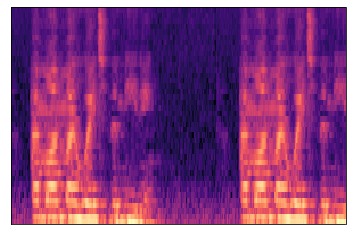

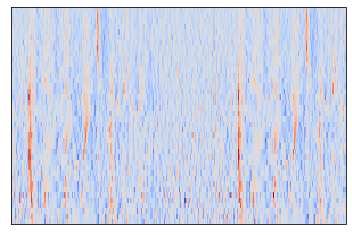

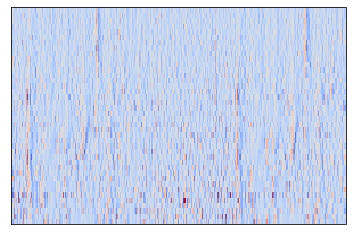

In [31]:
import matplotlib.pylab as plt
import librosa.display

fig = plt.figure()
for i in range(3):
    librosa.display.specshow(X_train[0][:,:,i])
    plt.show()
#librosa.display.specshow(X_train[0])
plt.show()

In [32]:
import warnings

import tensorflow
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

from tensorflow.keras.layers import ZeroPadding2D, BatchNormalization, Activation, Conv2D, SeparableConv2D
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D, GlobalMaxPooling2D
from tensorflow.keras.layers import Concatenate, Add, Multiply, Lambda
from tensorflow.keras.layers import LeakyReLU, LSTM, Bidirectional, Reshape, Attention
from tensorflow.keras.layers import add, MaxPool2D
from tensorflow.keras.layers import Dense, Dropout

from tensorflow.keras.regularizers import l2
from tensorflow.keras import backend as K

In [33]:
import tensorflow.keras
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import LearningRateScheduler, ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
import numpy as np

In [34]:
input_shape = X_train.shape[1:]
input_shape

(40, 294, 3)

In [37]:
from tensorflow.keras.layers import Layer

class Attention(Layer):
    
    def __init__(self, return_sequences=True):
        self.return_sequences = return_sequences
        super(Attention,self).__init__()
        
    def build(self, input_shape):
        
        self.W=self.add_weight(name="att_weight", shape=(input_shape[-1],1),
                               initializer="normal")
        self.b=self.add_weight(name="att_bias", shape=(input_shape[1],1),
                               initializer="zeros")
        
        super(Attention,self).build(input_shape)
        
    def call(self, x):
        
        e = K.tanh(K.dot(x,self.W)+self.b)
        a = K.softmax(e, axis=1)
        output = x*a
        
        if self.return_sequences:
            return output
        
        return K.sum(output, axis=1)
    
Inputs = Input(shape = input_shape)

tConv = Conv2D(128, 3, strides=1)(Inputs)
tConv = LeakyReLU()(tConv)
tConv = MaxPooling2D((2,4), strides=(2,4), padding="valid")(tConv)

shorcut = Conv2D(128, 3, strides=1, dilation_rate=2, padding="same")(tConv)
shorcut = BatchNormalization()(shorcut)

UFLB1 = Conv2D(128, 3, strides=1, dilation_rate=2, padding="same")(tConv)
UFLB1 = BatchNormalization()(UFLB1)
UFLB1 = LeakyReLU()(UFLB1)

UFLB2 = Conv2D(128, 3, strides=1, dilation_rate=2, padding="same")(UFLB1)
UFLB2 = BatchNormalization()(UFLB2)
UFLB2 = LeakyReLU()(UFLB2)

UFLB3 = Conv2D(128, 3, strides=1, dilation_rate=2, padding="same")(UFLB2)
UFLB3 = BatchNormalization()(UFLB3)
UFLB3 = LeakyReLU()(UFLB3)

DConv = Add()([shorcut, UFLB3])
DConv = LeakyReLU()(DConv)
#DConv = Dropout(0.5)(DConv)

Linear = GlobalAveragePooling2D()(UFLB3)
Linear = Reshape((-1,128))(Linear)
#Linear = Dense(128)(Linear)
#shape = UFLB3.shape
#Linear = Reshape((shape[1],shape[2]*shape[3]))(UFLB3)

#BLSTM = LSTM(256)(Linear)
BLSTM = Bidirectional(LSTM(256, return_sequences=True),merge_mode='sum')(Linear)

Atten = Attention(return_sequences=False)(BLSTM)

Output = Dense(6, activation='softmax')(Atten)
#Output = LeakyReLU()(Output)
#Output = Dropout(0.5)(Output)

model = Model(inputs=Inputs, outputs=Output)

adam = Adam(lr=1e-4)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['categorical_accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 40, 294, 3)]      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 38, 292, 128)      3584      
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 38, 292, 128)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 19, 73, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 19, 73, 128)       147584    
_________________________________________________________________
batch_normalization_5 (Batch (None, 19, 73, 128)       512       
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 19, 73, 128)       0   

In [ ]:
EPOCH = 300

def sigmoidal_decay(e, start=0, end=100, lr_start=1e-3, lr_end=1e-5):
    if e < start:
        return lr_start    
    if e > end:
        return lr_end    
    middle = (start + end) / 2
    s = lambda x: 1 / (1 + np.exp(-x))    
    return s(13 * (-e + middle) / np.abs(end - start)) * np.abs(lr_start - lr_end) + lr_end

lr_reduce = LearningRateScheduler(lambda e: sigmoidal_decay(e, end=EPOCH))

model.fit(X_train, Y_train, 
          validation_data=(X_val, Y_val),
          batch_size = 32,
          epochs=EPOCH, 
          callbacks=[lr_reduce])

Epoch 1/300
140/140 [==============================] - 178s 1s/step - loss: 1.5369 - categorical_accuracy: 0.3560 - val_loss: 5.6897 - val_categorical_accuracy: 0.1821
Epoch 2/300
140/140 [==============================] - 174s 1s/step - loss: 1.4226 - categorical_accuracy: 0.4193 - val_loss: 3.7236 - val_categorical_accuracy: 0.2090
Epoch 3/300
140/140 [==============================] - 174s 1s/step - loss: 1.3517 - categorical_accuracy: 0.4494 - val_loss: 1.9392 - val_categorical_accuracy: 0.2735
Epoch 4/300
140/140 [==============================] - 174s 1s/step - loss: 1.3144 - categorical_accuracy: 0.4816 - val_loss: 2.0540 - val_categorical_accuracy: 0.3286
Epoch 5/300
140/140 [==============================] - 173s 1s/step - loss: 1.2868 - categorical_accuracy: 0.5020 - val_loss: 6.1744 - val_categorical_accuracy: 0.2540
Epoch 6/300
140/140 [==============================] - 176s 1s/step - loss: 1.2588 - categorical_accuracy: 0.4962 - val_loss: 6.2525 - val_categorical_accuracy:

140/140 [==============================] - 199s 1s/step - loss: 0.8357 - categorical_accuracy: 0.6835 - val_loss: 6.5472 - val_categorical_accuracy: 0.1566
Epoch 50/300
140/140 [==============================] - 198s 1s/step - loss: 0.8496 - categorical_accuracy: 0.6711 - val_loss: 2.7171 - val_categorical_accuracy: 0.3582
Epoch 51/300
140/140 [==============================] - 198s 1s/step - loss: 0.7964 - categorical_accuracy: 0.7123 - val_loss: 8.4479 - val_categorical_accuracy: 0.2594
Epoch 52/300
140/140 [==============================] - 198s 1s/step - loss: 0.8172 - categorical_accuracy: 0.7049 - val_loss: 5.7160 - val_categorical_accuracy: 0.2433
Epoch 53/300
140/140 [==============================] - 198s 1s/step - loss: 0.7878 - categorical_accuracy: 0.7028 - val_loss: 11.1430 - val_categorical_accuracy: 0.1478
Epoch 54/300
140/140 [==============================] - 198s 1s/step - loss: 0.7663 - categorical_accuracy: 0.7066 - val_loss: 4.4518 - val_categorical_accuracy: 0.331

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



140/140 [==============================] - 101s 722ms/step - loss: 0.0868 - categorical_accuracy: 0.9705 - val_loss: 11.7680 - val_categorical_accuracy: 0.3589
Epoch 151/300
140/140 [==============================] - 101s 723ms/step - loss: 0.0588 - categorical_accuracy: 0.9786 - val_loss: 19.2775 - val_categorical_accuracy: 0.2937
Epoch 152/300
140/140 [==============================] - 101s 723ms/step - loss: 0.0905 - categorical_accuracy: 0.9671 - val_loss: 8.7224 - val_categorical_accuracy: 0.3817
Epoch 153/300
140/140 [==============================] - 101s 722ms/step - loss: 0.0886 - categorical_accuracy: 0.9671 - val_loss: 12.5969 - val_categorical_accuracy: 0.2392
Epoch 154/300
140/140 [==============================] - 101s 722ms/step - loss: 0.0704 - categorical_accuracy: 0.9754 - val_loss: 9.1281 - val_categorical_accuracy: 0.3347
Epoch 155/300
140/140 [==============================] - 101s 722ms/step - loss: 0.0855 - categorical_accuracy: 0.9695 - val_loss: 12.1921 - val_c

---

crema-testset

In [ ]:
training_files=[audio["filename"] for audio in train_db]

In [176]:
test_db

[{'filename': './kaggle/input/cremad/AudioWAV/1029_IOM_NEU_XX.wav',
  'emotion': 'NEU',
  'actor': '1029',
  'label': 5},
 {'filename': './kaggle/input/cremad/AudioWAV/1024_TAI_NEU_XX.wav',
  'emotion': 'NEU',
  'actor': '1024',
  'label': 5},
 {'filename': './kaggle/input/cremad/AudioWAV/1030_WSI_NEU_XX.wav',
  'emotion': 'NEU',
  'actor': '1030',
  'label': 5},
 {'filename': './kaggle/input/cremad/AudioWAV/1036_IWL_DIS_XX.wav',
  'emotion': 'DIS',
  'actor': '1036',
  'label': 2},
 {'filename': './kaggle/input/cremad/AudioWAV/1077_IEO_ANG_LO.wav',
  'emotion': 'ANG',
  'actor': '1077',
  'label': 1},
 {'filename': './kaggle/input/cremad/AudioWAV/1057_IWW_SAD_XX.wav',
  'emotion': 'SAD',
  'actor': '1057',
  'label': 0},
 {'filename': './kaggle/input/cremad/AudioWAV/1030_IWL_HAP_XX.wav',
  'emotion': 'HAP',
  'actor': '1030',
  'label': 4},
 {'filename': './kaggle/input/cremad/AudioWAV/1057_ITS_HAP_XX.wav',
  'emotion': 'HAP',
  'actor': '1057',
  'label': 4},
 {'filename': './kaggle/

In [178]:
output_dir

'./features/crema_delta_logmel'

In [177]:
feature = 'crema_delta_logmel'
output_dir = os.path.join('./features', feature)

In [179]:
item_list_test = []
for item in test_db:
    _, current_last_level_path = os.path.split(item["filename"])
    base_filename, _ = os.path.splitext(current_last_level_path)
    feature_filename = os.path.join(output_dir, base_filename+'.npz')
    
    item_ = {
        'data': {
            'filename': feature_filename
        },
        'meta': {
            'label': item["label"]
        }
    }
    item_list_test.append(item_)

In [180]:
item_list_test[:5]

[{'data': {'filename': './features/crema_delta_logmel/1029_IOM_NEU_XX.npz'},
  'meta': {'label': 5}},
 {'data': {'filename': './features/crema_delta_logmel/1024_TAI_NEU_XX.npz'},
  'meta': {'label': 5}},
 {'data': {'filename': './features/crema_delta_logmel/1030_WSI_NEU_XX.npz'},
  'meta': {'label': 5}},
 {'data': {'filename': './features/crema_delta_logmel/1036_IWL_DIS_XX.npz'},
  'meta': {'label': 2}},
 {'data': {'filename': './features/crema_delta_logmel/1077_IEO_ANG_LO.npz'},
  'meta': {'label': 1}}]

In [181]:
X_test = []
Y_test = []
for item in item_list_test:
    binary_matrix = np.zeros((6, 1))
    pos = item["meta"]["label"]
    binary_matrix[pos,:] = 1
    
    audio = np.load(item["data"]["filename"])
    embedding = audio['embedding']
    
    X_test.append(embedding)
    Y_test.append(binary_matrix.T)
    
X_test = np.array(X_test)
Y_test = np.vstack(Y_test)

In [182]:
embedding.shape

(40, 294, 3)

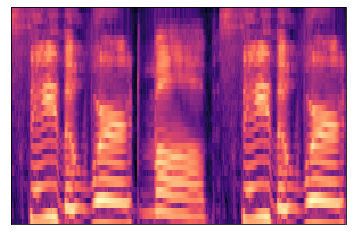

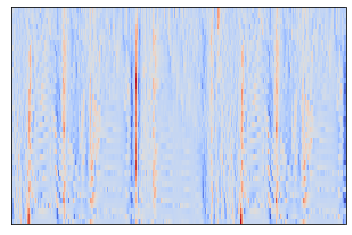

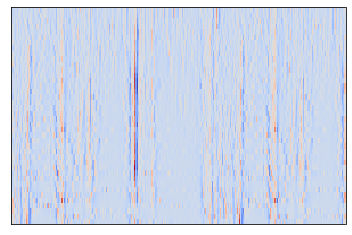

In [183]:
import matplotlib.pylab as plt
import librosa.display

fig = plt.figure()
for i in range(3):
    librosa.display.specshow(X_train[0][:,:,i])
    plt.show()
#librosa.display.specshow(X_train[0])
plt.show()

In [184]:
import warnings

import tensorflow
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

from tensorflow.keras.layers import ZeroPadding2D, BatchNormalization, Activation, Conv2D, SeparableConv2D
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D, GlobalMaxPooling2D
from tensorflow.keras.layers import Concatenate, Add, Multiply, Lambda
from tensorflow.keras.layers import LeakyReLU, LSTM, Bidirectional, Reshape, Attention
from tensorflow.keras.layers import add, MaxPool2D
from tensorflow.keras.layers import Dense, Dropout

from tensorflow.keras.regularizers import l2
from tensorflow.keras import backend as K

In [185]:
import tensorflow.keras
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import LearningRateScheduler, ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
import numpy as np

In [186]:
input_shape = X_train.shape[1:]
input_shape

(40, 294, 3)

In [189]:
from tensorflow.keras.layers import Layer

class Attention(Layer):
    
    def __init__(self, return_sequences=True):
        self.return_sequences = return_sequences
        super(Attention,self).__init__()
        
    def build(self, input_shape):
        
        self.W=self.add_weight(name="att_weight", shape=(input_shape[-1],1),
                               initializer="normal")
        self.b=self.add_weight(name="att_bias", shape=(input_shape[1],1),
                               initializer="zeros")
        
        super(Attention,self).build(input_shape)
        
    def call(self, x):
        
        e = K.tanh(K.dot(x,self.W)+self.b)
        a = K.softmax(e, axis=1)
        output = x*a
        
        if self.return_sequences:
            return output
        
        return K.sum(output, axis=1)
    
Inputs = Input(shape = input_shape)

tConv = Conv2D(128, 3, strides=1)(Inputs)
tConv = LeakyReLU()(tConv)
tConv = MaxPooling2D((2,4), strides=(2,4), padding="valid")(tConv)

shorcut = Conv2D(128, 3, strides=1, dilation_rate=2, padding="same")(tConv)
shorcut = BatchNormalization()(shorcut)

UFLB1 = Conv2D(128, 3, strides=1, dilation_rate=2, padding="same")(tConv)
UFLB1 = BatchNormalization()(UFLB1)
UFLB1 = LeakyReLU()(UFLB1)

UFLB2 = Conv2D(128, 3, strides=1, dilation_rate=2, padding="same")(UFLB1)
UFLB2 = BatchNormalization()(UFLB2)
UFLB2 = LeakyReLU()(UFLB2)

UFLB3 = Conv2D(128, 3, strides=1, dilation_rate=2, padding="same")(UFLB2)
UFLB3 = BatchNormalization()(UFLB3)
UFLB3 = LeakyReLU()(UFLB3)

DConv = Add()([shorcut, UFLB3])
DConv = LeakyReLU()(DConv)
#DConv = Dropout(0.5)(DConv)

Linear = GlobalAveragePooling2D()(UFLB3)
Linear = Reshape((-1,128))(Linear)
#Linear = Dense(128)(Linear)
#shape = UFLB3.shape
#Linear = Reshape((shape[1],shape[2]*shape[3]))(UFLB3)

#BLSTM = LSTM(256)(Linear)
BLSTM = Bidirectional(LSTM(256, return_sequences=True),merge_mode='sum')(Linear)

Atten = Attention(return_sequences=False)(BLSTM)

Output = Dense(6, activation='softmax')(Atten)
#Output = LeakyReLU()(Output)
#Output = Dropout(0.5)(Output)

model = Model(inputs=Inputs, outputs=Output)

adam = Adam(lr=1e-4)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['categorical_accuracy'])
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 40, 294, 3)]      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 38, 292, 128)      3584      
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 38, 292, 128)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 19, 73, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 19, 73, 128)       147584    
_________________________________________________________________
batch_normalization_9 (Batch (None, 19, 73, 128)       512       
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 19, 73, 128)       0   

In [190]:
EPOCH = 500

def sigmoidal_decay(e, start=0, end=100, lr_start=1e-3, lr_end=1e-5):
    if e < start:
        return lr_start    
    if e > end:
        return lr_end    
    middle = (start + end) / 2
    s = lambda x: 1 / (1 + np.exp(-x))    
    return s(13 * (-e + middle) / np.abs(end - start)) * np.abs(lr_start - lr_end) + lr_end

lr_reduce = LearningRateScheduler(lambda e: sigmoidal_decay(e, end=EPOCH))

model.fit(X_train, Y_train, 
          validation_data=(X_test, Y_test),
          batch_size = 32,
          epochs=EPOCH, 
          callbacks=[lr_reduce])

Epoch 1/500
75/75 [==============================] - 106s 1s/step - loss: 1.1585 - categorical_accuracy: 0.5084 - val_loss: 3.1259 - val_categorical_accuracy: 0.1719
Epoch 2/500
75/75 [==============================] - 103s 1s/step - loss: 0.3634 - categorical_accuracy: 0.8775 - val_loss: 10.1294 - val_categorical_accuracy: 0.1763
Epoch 3/500
75/75 [==============================] - 108s 1s/step - loss: 0.0945 - categorical_accuracy: 0.9781 - val_loss: 8.8708 - val_categorical_accuracy: 0.1822
Epoch 4/500
75/75 [==============================] - 106s 1s/step - loss: 0.0686 - categorical_accuracy: 0.9821 - val_loss: 14.2784 - val_categorical_accuracy: 0.1708
Epoch 5/500
75/75 [==============================] - 108s 1s/step - loss: 0.0847 - categorical_accuracy: 0.9729 - val_loss: 9.4783 - val_categorical_accuracy: 0.1838
Epoch 6/500
75/75 [==============================] - 110s 1s/step - loss: 0.0491 - categorical_accuracy: 0.9864 - val_loss: 9.6315 - val_categorical_accuracy: 0.2663
Ep

75/75 [==============================] - 102s 1s/step - loss: 1.7664e-04 - categorical_accuracy: 1.0000 - val_loss: 18.3635 - val_categorical_accuracy: 0.1729
Epoch 98/500
75/75 [==============================] - 102s 1s/step - loss: 5.2481e-05 - categorical_accuracy: 1.0000 - val_loss: 17.9664 - val_categorical_accuracy: 0.1727
Epoch 99/500
75/75 [==============================] - 102s 1s/step - loss: 4.3457e-04 - categorical_accuracy: 1.0000 - val_loss: 20.3742 - val_categorical_accuracy: 0.1727
Epoch 100/500
75/75 [==============================] - 102s 1s/step - loss: 0.0063 - categorical_accuracy: 0.9983 - val_loss: 7.6986 - val_categorical_accuracy: 0.2185
Epoch 101/500
75/75 [==============================] - 105s 1s/step - loss: 0.0226 - categorical_accuracy: 0.9934 - val_loss: 11.6452 - val_categorical_accuracy: 0.1897
Epoch 102/500
75/75 [==============================] - 100s 1s/step - loss: 0.0063 - categorical_accuracy: 0.9972 - val_loss: 17.4177 - val_categorical_accuracy

Epoch 145/500
75/75 [==============================] - 100s 1s/step - loss: 1.1644e-04 - categorical_accuracy: 1.0000 - val_loss: 14.0884 - val_categorical_accuracy: 0.1829
Epoch 146/500
75/75 [==============================] - 101s 1s/step - loss: 1.0766e-04 - categorical_accuracy: 1.0000 - val_loss: 14.2959 - val_categorical_accuracy: 0.1889
Epoch 147/500
75/75 [==============================] - 102s 1s/step - loss: 1.0537e-04 - categorical_accuracy: 1.0000 - val_loss: 13.9584 - val_categorical_accuracy: 0.1837
Epoch 148/500
75/75 [==============================] - 102s 1s/step - loss: 8.2378e-05 - categorical_accuracy: 1.0000 - val_loss: 13.6127 - val_categorical_accuracy: 0.1786
Epoch 149/500
75/75 [==============================] - 102s 1s/step - loss: 2.0378e-04 - categorical_accuracy: 1.0000 - val_loss: 13.4801 - val_categorical_accuracy: 0.1787
Epoch 150/500
75/75 [==============================] - 102s 1s/step - loss: 4.9313e-05 - categorical_accuracy: 1.0000 - val_loss: 13.64

Epoch 193/500
75/75 [==============================] - 102s 1s/step - loss: 9.1137e-05 - categorical_accuracy: 1.0000 - val_loss: 16.1712 - val_categorical_accuracy: 0.1811
Epoch 194/500
75/75 [==============================] - 102s 1s/step - loss: 7.2019e-05 - categorical_accuracy: 1.0000 - val_loss: 17.6727 - val_categorical_accuracy: 0.1774
Epoch 195/500
75/75 [==============================] - 100s 1s/step - loss: 5.9891e-05 - categorical_accuracy: 1.0000 - val_loss: 18.4528 - val_categorical_accuracy: 0.1763
Epoch 196/500
75/75 [==============================] - 100s 1s/step - loss: 4.0724e-05 - categorical_accuracy: 1.0000 - val_loss: 17.9422 - val_categorical_accuracy: 0.1772
Epoch 197/500
75/75 [==============================] - 100s 1s/step - loss: 2.9807e-05 - categorical_accuracy: 1.0000 - val_loss: 17.9435 - val_categorical_accuracy: 0.1766
Epoch 198/500
75/75 [==============================] - 100s 1s/step - loss: 2.5461e-05 - categorical_accuracy: 1.0000 - val_loss: 17.78

Epoch 288/500
75/75 [==============================] - 86s 1s/step - loss: 7.7715e-06 - categorical_accuracy: 1.0000 - val_loss: 17.3945 - val_categorical_accuracy: 0.1774
Epoch 289/500
75/75 [==============================] - 86s 1s/step - loss: 1.3453e-05 - categorical_accuracy: 1.0000 - val_loss: 17.1644 - val_categorical_accuracy: 0.1782
Epoch 290/500
75/75 [==============================] - 86s 1s/step - loss: 6.3560e-06 - categorical_accuracy: 1.0000 - val_loss: 17.2146 - val_categorical_accuracy: 0.1780
Epoch 291/500
75/75 [==============================] - 86s 1s/step - loss: 4.5550e-06 - categorical_accuracy: 1.0000 - val_loss: 17.5157 - val_categorical_accuracy: 0.1790
Epoch 292/500
75/75 [==============================] - 86s 1s/step - loss: 6.6918e-06 - categorical_accuracy: 1.0000 - val_loss: 17.5053 - val_categorical_accuracy: 0.1798
Epoch 293/500
75/75 [==============================] - 86s 1s/step - loss: 1.6326e-05 - categorical_accuracy: 1.0000 - val_loss: 17.7083 - v

Epoch 336/500
75/75 [==============================] - 86s 1s/step - loss: 6.4801e-05 - categorical_accuracy: 1.0000 - val_loss: 17.3734 - val_categorical_accuracy: 0.1783
Epoch 337/500
75/75 [==============================] - 86s 1s/step - loss: 4.9749e-06 - categorical_accuracy: 1.0000 - val_loss: 17.8507 - val_categorical_accuracy: 0.1766
Epoch 338/500
75/75 [==============================] - 86s 1s/step - loss: 5.5680e-06 - categorical_accuracy: 1.0000 - val_loss: 18.1142 - val_categorical_accuracy: 0.1759
Epoch 339/500
75/75 [==============================] - 86s 1s/step - loss: 1.2087e-05 - categorical_accuracy: 1.0000 - val_loss: 18.3685 - val_categorical_accuracy: 0.1752
Epoch 340/500
75/75 [==============================] - 86s 1s/step - loss: 2.5949e-05 - categorical_accuracy: 1.0000 - val_loss: 18.2394 - val_categorical_accuracy: 0.1756
Epoch 341/500
75/75 [==============================] - 86s 1s/step - loss: 5.1712e-06 - categorical_accuracy: 1.0000 - val_loss: 18.2538 - v

Epoch 431/500
75/75 [==============================] - 86s 1s/step - loss: 4.0362e-06 - categorical_accuracy: 1.0000 - val_loss: 18.3171 - val_categorical_accuracy: 0.1803
Epoch 432/500
75/75 [==============================] - 86s 1s/step - loss: 2.7933e-06 - categorical_accuracy: 1.0000 - val_loss: 18.3263 - val_categorical_accuracy: 0.1784
Epoch 433/500
75/75 [==============================] - 86s 1s/step - loss: 3.1932e-06 - categorical_accuracy: 1.0000 - val_loss: 18.3553 - val_categorical_accuracy: 0.1775
Epoch 434/500
75/75 [==============================] - 86s 1s/step - loss: 6.6511e-06 - categorical_accuracy: 1.0000 - val_loss: 18.3457 - val_categorical_accuracy: 0.1771
Epoch 435/500
75/75 [==============================] - 86s 1s/step - loss: 7.1140e-06 - categorical_accuracy: 1.0000 - val_loss: 18.3639 - val_categorical_accuracy: 0.1771
Epoch 436/500
75/75 [==============================] - 86s 1s/step - loss: 3.5386e-06 - categorical_accuracy: 1.0000 - val_loss: 18.3557 - v